In [1]:
# Import modules and packages
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
import pysal as ps
from splot.mapping import vba_choropleth
import matplotlib.pyplot as plt
import datetime as dt

/home/aaronsodhi/virtualenvs/housepredmodel/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Set file path for data
data_folder = Path("/home/aaronsodhi/HousePricePredictionModel/data/")

# Load average price data
avg_price_ssn_adj = data_folder / "LatestMonth/Average-price-seasonally-adjusted-2020-12.csv"
avg_price = data_folder / "LatestMonth/Average-prices-2020-12.csv"
avg_price_prop_type = data_folder / "LatestMonth/Average-prices-Property-Type-2020-12.csv"
indices = data_folder / "LatestMonth/Indices-2020-12.csv"
indices_ssn_adj = data_folder / "LatestMonth/Indices-seasonally-adjusted-2020-12.csv"


# Load floor space data
floor_space = data_folder / 'PricePerData/House_Price_per_area_(metre_squared),_2004_to_2016_by_English_region_(house_and_flat).csv'
area_region_flats = data_folder / 'PricePerData/House_Price_per_area_2004_2016_by_country_and_region_flats_only.csv'
area_region_other = data_folder / 'PricePerData/House_Price_per_area_2004_2016_by_country_and_region_excluding_flats.csv'
area_la_flats = data_folder / 'PricePerData/House_Price_per_area_2004_2016_by_local_authority_flats_only.csv'
area_la_other = data_folder / 'PricePerData/House_Price_per_area_2004_2016_by_local_authority_excluding_flats.csv'

# Load room data
room_price = data_folder / 'PricePerData/House_Price_per_(habitable)_room,_2004_to_2016_by_English_region_(house_and_flat)_.csv'
room_region_flats = data_folder / 'PricePerData/House_Price_per_habitable_room_2004_2016_by_country_and_region_flats_only.csv'
room_region_other = data_folder / 'PricePerData/House_Price_per_habitable_room_2004_2016_by_country_and_region_excluding_flats.csv'
room_la_flats = data_folder / 'PricePerData/House_Price_per_habitable_room_2004_2016_by_local_authority_flats_only.csv'
room_la_other = data_folder / 'PricePerData/House_Price_per_habitable_room_2004_2016_by_local_authority_excluding_flats.csv'

In [3]:
# Read data files

# Seasonally Adjusted Average Price
saap = pd.read_csv(avg_price_ssn_adj)

# Average Price per Property Type
appt = pd.read_csv(avg_price_prop_type)

appt = appt.rename(columns={"Region_Name": "Region"})
appt['Region'] = appt['Region'].replace({'West Midlands Region':'West Midlands'})
appt['Local_Authority'] = appt['Region']

# Price per Floor Space
ppfs = pd.read_csv(area_la_flats)
appt['Local_Authority'].unique()

array(['Wales', 'England', 'Outer London', 'Inner London', 'North West',
       'North East', 'West Midlands', 'East Midlands', 'London',
       'South East', 'South West', 'East of England',
       'Yorkshire and The Humber', 'South Yorkshire', 'West Yorkshire',
       'Merseyside', 'Greater Manchester', 'Tyne and Wear',
       'Northamptonshire', 'Nottinghamshire', 'Worcestershire',
       'Somerset', 'Staffordshire', 'Warwickshire', 'West Sussex',
       'North Yorkshire', 'Surrey', 'Suffolk', 'Gloucestershire', 'Essex',
       'Oxfordshire', 'Devon', 'Derbyshire', 'Cumbria', 'Norfolk',
       'East Sussex', 'Lancashire', 'Kent', 'Hertfordshire', 'Hampshire',
       'Cambridgeshire', 'Leicestershire', 'Lincolnshire',
       'Waltham Forest', 'Tower Hamlets', 'Lewisham', 'Brent', 'Bromley',
       'Camden', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Harrow', 'Havering', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       

<AxesSubplot:>

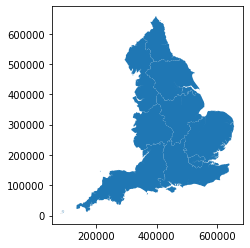

In [4]:
# Read shapefile for mapping regions
regions = gpd.read_file(data_folder / 'Regions/Regions_(December_2018)_EN_BFC.shp')
regions.plot()

In [5]:
# Merging local authorities into regions
appt['Region'] = appt['Region'].replace('South Yorkshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('West Yorkshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Merseyside','North West')
appt['Region'] = appt['Region'].replace('Greater Manchester','North West')
appt['Region'] = appt['Region'].replace('Tyne and Wear','North East')
appt['Region'] = appt['Region'].replace('Northamptonshire','East Midlands')
appt['Region'] = appt['Region'].replace('Nottinghamshire','East Midlands')
appt['Region'] = appt['Region'].replace('Worcestershire','West Midlands')
appt['Region'] = appt['Region'].replace('Somerset','South West')
appt['Region'] = appt['Region'].replace('Staffordshire','West Midlands')
appt['Region'] = appt['Region'].replace('Warwickshire','West Midlands')
appt['Region'] = appt['Region'].replace('West Sussex','South East')
appt['Region'] = appt['Region'].replace('North Yorkshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Surrey','South East')
appt['Region'] = appt['Region'].replace('Suffolk','East of England')
appt['Region'] = appt['Region'].replace('Gloucestershire','South West')
appt['Region'] = appt['Region'].replace('Essex','East of England')
appt['Region'] = appt['Region'].replace('Oxfordshire','South East')
appt['Region'] = appt['Region'].replace('Devon','South West')
appt['Region'] = appt['Region'].replace('Derbyshire','East Midlands')
appt['Region'] = appt['Region'].replace('Cumbria','North West')
appt['Region'] = appt['Region'].replace('Norfolk','East of England')
appt['Region'] = appt['Region'].replace('East Sussex','South East')
appt['Region'] = appt['Region'].replace('Lancashire','North West')
appt['Region'] = appt['Region'].replace('Kent','South East')
appt['Region'] = appt['Region'].replace('Hertfordshire','East of England')
appt['Region'] = appt['Region'].replace('Hampshire','South East')
appt['Region'] = appt['Region'].replace('Cambridgeshire','East of England')
appt['Region'] = appt['Region'].replace('Leicestershire','East Midlands')
appt['Region'] = appt['Region'].replace('Lincolnshire','East Midlands')
appt['Region'] = appt['Region'].replace('Waltham Forest','London')
appt['Region'] = appt['Region'].replace('Tower Hamlets','London')
appt['Region'] = appt['Region'].replace('Lewisham','London')
appt['Region'] = appt['Region'].replace('Brent','London')
appt['Region'] = appt['Region'].replace('Bromley','London')
appt['Region'] = appt['Region'].replace('Camden','London')
appt['Region'] = appt['Region'].replace('Greenwich','London')
appt['Region'] = appt['Region'].replace('Hackney','London')
appt['Region'] = appt['Region'].replace('Hammersmith and Fulham','London')
appt['Region'] = appt['Region'].replace('Harrow','London')
appt['Region'] = appt['Region'].replace('Havering','London')
appt['Region'] = appt['Region'].replace('Hounslow','London')
appt['Region'] = appt['Region'].replace('Islington','London')
appt['Region'] = appt['Region'].replace('Kensington and Chelsea','London')
appt['Region'] = appt['Region'].replace('Kingston upon Thames','London')
appt['Region'] = appt['Region'].replace('Lambeth','London')
appt['Region'] = appt['Region'].replace('Ealing','London')
appt['Region'] = appt['Region'].replace('Enfield','London')
appt['Region'] = appt['Region'].replace('Merton','London')
appt['Region'] = appt['Region'].replace('Newham','London')
appt['Region'] = appt['Region'].replace('Barking and Dagenham','London')
appt['Region'] = appt['Region'].replace('Barnet','London')
appt['Region'] = appt['Region'].replace('City of London','London')
appt['Region'] = appt['Region'].replace('City of Westminster','London')
appt['Region'] = appt['Region'].replace('Croydon','London')
appt['Region'] = appt['Region'].replace('Hillingdon','London')
appt['Region'] = appt['Region'].replace('Redbridge','London')
appt['Region'] = appt['Region'].replace('Richmond upon Thames','London')
appt['Region'] = appt['Region'].replace('Sutton','London')
appt['Region'] = appt['Region'].replace('Southwark','London')
appt['Region'] = appt['Region'].replace('Haringey','London')
appt['Region'] = appt['Region'].replace('Bexley','London')
appt['Region'] = appt['Region'].replace('Wandsworth','London')
appt['Region'] = appt['Region'].replace('Walsall','West Midlands')
appt['Region'] = appt['Region'].replace('Wigan','North West')
appt['Region'] = appt['Region'].replace('Wirral','North West')
appt['Region'] = appt['Region'].replace('Leeds','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Liverpool','North West')
appt['Region'] = appt['Region'].replace('Bury','North West')
appt['Region'] = appt['Region'].replace('Calderdale','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Kirklees','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Knowsley','North West')
appt['Region'] = appt['Region'].replace('Newcastle upon Tyne','North East')
appt['Region'] = appt['Region'].replace('Barnsley','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Birmingham','West Midlands')
appt['Region'] = appt['Region'].replace('Bolton','North West')
appt['Region'] = appt['Region'].replace('Bradford','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Coventry','West Midlands')
appt['Region'] = appt['Region'].replace('Doncaster','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Dudley','West Midlands')
appt['Region'] = appt['Region'].replace('Rochdale','North West')
appt['Region'] = appt['Region'].replace('Gateshead','North East')
appt['Region'] = appt['Region'].replace('Stockport','North West')
appt['Region'] = appt['Region'].replace('Sunderland','North East')
appt['Region'] = appt['Region'].replace('Tameside','North West')
appt['Region'] = appt['Region'].replace('North Tyneside','North East')
appt['Region'] = appt['Region'].replace('Oldham','North West')
appt['Region'] = appt['Region'].replace('Wolverhampton','West Midlands')
appt['Region'] = appt['Region'].replace('Rotherham','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Salford','North West')
appt['Region'] = appt['Region'].replace('Sandwell','West Midlands')
appt['Region'] = appt['Region'].replace('Sefton','North West')
appt['Region'] = appt['Region'].replace('Sheffield','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Solihull','West Midlands')
appt['Region'] = appt['Region'].replace('South Tyneside','North East')
appt['Region'] = appt['Region'].replace('St Helens','North West')
appt['Region'] = appt['Region'].replace('Manchester','North West')
appt['Region'] = appt['Region'].replace('Trafford','North West')
appt['Region'] = appt['Region'].replace('Wakefield','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Lewes','South East')
appt['Region'] = appt['Region'].replace('Lichfield','West Midlands')
appt['Region'] = appt['Region'].replace('Lincoln','East Midlands')
appt['Region'] = appt['Region'].replace('Maidstone','South East')
appt['Region'] = appt['Region'].replace('Maldon','East of England')
appt['Region'] = appt['Region'].replace('Malvern Hills','West Midlands')
appt['Region'] = appt['Region'].replace('Mansfield','East Midlands')
appt['Region'] = appt['Region'].replace('Melton','East Midlands')
appt['Region'] = appt['Region'].replace('Mendip','South East')
appt['Region'] = appt['Region'].replace('Breckland','East of England')
appt['Region'] = appt['Region'].replace('Brentwood','East of England')
appt['Region'] = appt['Region'].replace('Broadland','East of England')
appt['Region'] = appt['Region'].replace('Bromsgrove','West Midlands')
appt['Region'] = appt['Region'].replace('Broxbourne','East of England')
appt['Region'] = appt['Region'].replace('Broxtowe','East Midlands')
appt['Region'] = appt['Region'].replace('Burnley','North West')
appt['Region'] = appt['Region'].replace('Cambridge','East of England')
appt['Region'] = appt['Region'].replace('Cannock Chase','West Midlands')
appt['Region'] = appt['Region'].replace('Canterbury','South East')
appt['Region'] = appt['Region'].replace('Gravesham','South East')
appt['Region'] = appt['Region'].replace('Great Yarmouth','East')
appt['Region'] = appt['Region'].replace('Guildford','South East')
appt['Region'] = appt['Region'].replace('Hambleton','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Harborough','East Midlands')
appt['Region'] = appt['Region'].replace('Harlow','East of England')
appt['Region'] = appt['Region'].replace('Harrogate','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Hart','South East')
appt['Region'] = appt['Region'].replace('Hastings','South East')
appt['Region'] = appt['Region'].replace('Havant','South East')
appt['Region'] = appt['Region'].replace('Hertsmere','East of England')
appt['Region'] = appt['Region'].replace('High Peak','East Midlands')
appt['Region'] = appt['Region'].replace('Hinckley and Bosworth','East Midlands')
appt['Region'] = appt['Region'].replace('Horsham','South East')
appt['Region'] = appt['Region'].replace('Huntingdonshire','East of England')
appt['Region'] = appt['Region'].replace('Hyndburn','North West')
appt['Region'] = appt['Region'].replace('Ipswich','East of England')
appt['Region'] = appt['Region'].replace('Kettering','East Midlands')
appt['Region'] = appt['Region'].replace("King's Lynn and West Norfolk ",'East of England')
appt['Region'] = appt['Region'].replace('East Cambridgeshire','East of England')
appt['Region'] = appt['Region'].replace('East Devon','South West')
appt['Region'] = appt['Region'].replace('East Hampshire','South East')
appt['Region'] = appt['Region'].replace('East Hertfordshire','East of England')
appt['Region'] = appt['Region'].replace('East Lindsey','East Midlands')
appt['Region'] = appt['Region'].replace('East Northamptonshire','South East')
appt['Region'] = appt['Region'].replace('East Staffordshire','West Midlands')
appt['Region'] = appt['Region'].replace('Eastbourne','South East')
appt['Region'] = appt['Region'].replace('Eastleigh','South East')
appt['Region'] = appt['Region'].replace('Eden','North West')
appt['Region'] = appt['Region'].replace('Elmbridge','South East')
appt['Region'] = appt['Region'].replace('East Hampshire','East of England')
appt['Region'] = appt['Region'].replace('Epping Forest','South East')
appt['Region'] = appt['Region'].replace('Epsom and Ewell','South East')
appt['Region'] = appt['Region'].replace('Erewash','East Midlands')
appt['Region'] = appt['Region'].replace('Mid Devon','South West')
appt['Region'] = appt['Region'].replace('Mid Suffolk','East of England')
appt['Region'] = appt['Region'].replace('Mid Sussex','South East')
appt['Region'] = appt['Region'].replace('Mole Valley','South East')
appt['Region'] = appt['Region'].replace('New Forest','South East')
appt['Region'] = appt['Region'].replace('Newark and Sherwood','East Midlands')
appt['Region'] = appt['Region'].replace('Newcastle-under-Lyme','North East')
appt['Region'] = appt['Region'].replace('North Devon','South West')
appt['Region'] = appt['Region'].replace('North East Derbyshire','East Midlands')
appt['Region'] = appt['Region'].replace('Adur','South East')
appt['Region'] = appt['Region'].replace('Allerdale','North West')
appt['Region'] = appt['Region'].replace('Amber Valley','East Midlands')
appt['Region'] = appt['Region'].replace('Arun','South East')
appt['Region'] = appt['Region'].replace('Ashfield','East Midlands')
appt['Region'] = appt['Region'].replace('Lancaster','North West')
appt['Region'] = appt['Region'].replace('Barrow-in-Furness','North West')
appt['Region'] = appt['Region'].replace('Basildon','East of England')
appt['Region'] = appt['Region'].replace('Basingstoke and Deane','South East')
appt['Region'] = appt['Region'].replace('Bassetlaw','East Midlands')
appt['Region'] = appt['Region'].replace('Blaby','East Midlands')
appt['Region'] = appt['Region'].replace('Bolsover','East Midlands')
appt['Region'] = appt['Region'].replace('Boston','East Midlands')
appt['Region'] = appt['Region'].replace('Braintree','East of England')
appt['Region'] = appt['Region'].replace('Carlisle','North West')
appt['Region'] = appt['Region'].replace('Castle Point','East of England')
appt['Region'] = appt['Region'].replace('Charnwood','East Midlands')
appt['Region'] = appt['Region'].replace('Chelmsford','East of England')
appt['Region'] = appt['Region'].replace('Cheltenham','South West')
appt['Region'] = appt['Region'].replace('Cherwell','South East')
appt['Region'] = appt['Region'].replace('Chesterfield','East Midlands')
appt['Region'] = appt['Region'].replace('Chichester','South East')
appt['Region'] = appt['Region'].replace('Chorley','North West')
appt['Region'] = appt['Region'].replace('Colchester','East of England')
appt['Region'] = appt['Region'].replace('Copeland','North West')
appt['Region'] = appt['Region'].replace('Corby','East Midlands')
appt['Region'] = appt['Region'].replace('Craven','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Crawley','South East')
appt['Region'] = appt['Region'].replace('Dacorum','East of England')
appt['Region'] = appt['Region'].replace('Dartford','South East')
appt['Region'] = appt['Region'].replace('Daventry','East Midlands')
appt['Region'] = appt['Region'].replace('Derbyshire Dales','East Midlands')
appt['Region'] = appt['Region'].replace('Dover','South East')
appt['Region'] = appt['Region'].replace('Oxford','South East')
appt['Region'] = appt['Region'].replace('Pendle','North West')
appt['Region'] = appt['Region'].replace('Preston','North West')
appt['Region'] = appt['Region'].replace('Redditch','West Midlands')
appt['Region'] = appt['Region'].replace('Reigate and Banstead','South East')
appt['Region'] = appt['Region'].replace('Ribble Valley','North West')
appt['Region'] = appt['Region'].replace('Richmondshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Rochford','East of England')
appt['Region'] = appt['Region'].replace('Rossendale','North West')
appt['Region'] = appt['Region'].replace('Exeter','South West')
appt['Region'] = appt['Region'].replace('Fareham','South East')
appt['Region'] = appt['Region'].replace('Fenland','East of England')
appt['Region'] = appt['Region'].replace('Forest of Dean','South West')
appt['Region'] = appt['Region'].replace('Fylde','North West')
appt['Region'] = appt['Region'].replace('Gloucester','South West')
appt['Region'] = appt['Region'].replace('Staffordshire Moorlands','West Midlands')
appt['Region'] = appt['Region'].replace('Stratford-on-Avon','West Midlands')
appt['Region'] = appt['Region'].replace('Stroud','South West')
appt['Region'] = appt['Region'].replace('Surrey Heath','South East')
appt['Region'] = appt['Region'].replace('Swale','South East')
appt['Region'] = appt['Region'].replace('Tamworth','West Midlands')
appt['Region'] = appt['Region'].replace('Tandridge','South East')
appt['Region'] = appt['Region'].replace('Teignbridge','South West')
appt['Region'] = appt['Region'].replace('Tendring','East of England')
appt['Region'] = appt['Region'].replace('Test Valley','South East')
appt['Region'] = appt['Region'].replace('North Hertfordshire','East of England')
appt['Region'] = appt['Region'].replace('North Kesteven','East Midlands')
appt['Region'] = appt['Region'].replace('North Norfolk','East of England')
appt['Region'] = appt['Region'].replace('North Warwickshire','West Midlands')
appt['Region'] = appt['Region'].replace('North West Leicestershire','East Midlands')
appt['Region'] = appt['Region'].replace('Northampton','South East')
appt['Region'] = appt['Region'].replace('Babergh','East of England')
appt['Region'] = appt['Region'].replace('Oadby and Wigston','East Midlands')
appt['Region'] = appt['Region'].replace('Worcester','West Midlands')
appt['Region'] = appt['Region'].replace('Worthing','South East')
appt['Region'] = appt['Region'].replace('Wychavon','West Midlands')
appt['Region'] = appt['Region'].replace('Wyre','North West')
appt['Region'] = appt['Region'].replace('Wyre Forest','West Midlands')
appt['Region'] = appt['Region'].replace('Rother','South East')
appt['Region'] = appt['Region'].replace('Rugby','West Midlands')
appt['Region'] = appt['Region'].replace('Runnymede','South East')
appt['Region'] = appt['Region'].replace('Rushcliffe','East Midlands')
appt['Region'] = appt['Region'].replace('Rushmoor','South East')
appt['Region'] = appt['Region'].replace('Ryedale','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Scarborough','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Sedgemoor','South West')
appt['Region'] = appt['Region'].replace('Selby','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Sevenoaks','South East')
appt['Region'] = appt['Region'].replace('Folkestone and Hythe','South East')
appt['Region'] = appt['Region'].replace('South Cambridgeshire','East of England')
appt['Region'] = appt['Region'].replace('South Derbyshire','East Midlands')
appt['Region'] = appt['Region'].replace('South Hams','South West')
appt['Region'] = appt['Region'].replace('South Holland','East Midlands')
appt['Region'] = appt['Region'].replace('South Kesteven','East Midlands')
appt['Region'] = appt['Region'].replace('South Lakeland','North West')
appt['Region'] = appt['Region'].replace('South Norfolk','East of England')
appt['Region'] = appt['Region'].replace('South Northamptonshire','South East')
appt['Region'] = appt['Region'].replace('South Oxfordshire','South East')
appt['Region'] = appt['Region'].replace('South Ribble','North West')
appt['Region'] = appt['Region'].replace('South Staffordshire','West Midlands')
appt['Region'] = appt['Region'].replace('Spelthorne','South East')
appt['Region'] = appt['Region'].replace('South Norfolk','East of England')
appt['Region'] = appt['Region'].replace('Stafford','West Midlands')
appt['Region'] = appt['Region'].replace('Tewkesbury','South West')
appt['Region'] = appt['Region'].replace('Thanet','South East')
appt['Region'] = appt['Region'].replace('Three Rivers','East of England')
appt['Region'] = appt['Region'].replace('Tonbridge and Malling','South East')
appt['Region'] = appt['Region'].replace('West Suffolk','East of England')
appt['Region'] = appt['Region'].replace('Somerset West and Taunton','South West')
appt['Region'] = appt['Region'].replace('East Suffolk','East of England')
appt['Region'] = appt['Region'].replace('South Somerset','South West')
appt['Region'] = appt['Region'].replace('Ashford','South East')
appt['Region'] = appt['Region'].replace('Gedling','East Midlands')
appt['Region'] = appt['Region'].replace('Gosport','South East')
appt['Region'] = appt['Region'].replace('Stevenage','East of England')
appt['Region'] = appt['Region'].replace('Nuneaton and Bedworth','West Midlands')
appt['Region'] = appt['Region'].replace('Cotswold','South West')
appt['Region'] = appt['Region'].replace('Torridge','South West')
appt['Region'] = appt['Region'].replace('Tunbridge Wells','South East')
appt['Region'] = appt['Region'].replace('Uttlesford','East')
appt['Region'] = appt['Region'].replace('Vale of White Horse','South East')
appt['Region'] = appt['Region'].replace('Warwick','West Midlands')
appt['Region'] = appt['Region'].replace('Watford','East of England')
appt['Region'] = appt['Region'].replace('Waverley','South East')
appt['Region'] = appt['Region'].replace('Wealden','South East')
appt['Region'] = appt['Region'].replace('Wellingborough','East Midlands')
appt['Region'] = appt['Region'].replace('Welwyn Hatfield','East of England')
appt['Region'] = appt['Region'].replace('West Devon','South West')
appt['Region'] = appt['Region'].replace('West Lancashire','South West')
appt['Region'] = appt['Region'].replace('West Lindsey','East Midlands')
appt['Region'] = appt['Region'].replace('West Oxfordshire','South East')
appt['Region'] = appt['Region'].replace('Winchester','South East')
appt['Region'] = appt['Region'].replace('Woking','South East')
appt['Region'] = appt['Region'].replace('Norwich','East of England')
appt['Region'] = appt['Region'].replace('Torfaen','Wales')
appt['Region'] = appt['Region'].replace('Bournemouth Christchurch and Poole','South East')
appt['Region'] = appt['Region'].replace('Medway','South East')
appt['Region'] = appt['Region'].replace('City of Kingston upon Hull','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Carmarthenshire','Wales')
appt['Region'] = appt['Region'].replace('Swindon','South West')
appt['Region'] = appt['Region'].replace('Slough','South East')
appt['Region'] = appt['Region'].replace('Bath and North East Somerset','South West')
appt['Region'] = appt['Region'].replace('Vale of Glamorgan','Wales')
appt['Region'] = appt['Region'].replace('Warrington','North West')
appt['Region'] = appt['Region'].replace('West Berkshire','South East')
appt['Region'] = appt['Region'].replace('Wiltshire','South West')
appt['Region'] = appt['Region'].replace('Windsor and Maidenhead','South East')
appt['Region'] = appt['Region'].replace('Wokingham','South East')
appt['Region'] = appt['Region'].replace('Leicester','East Midlands')
appt['Region'] = appt['Region'].replace('Luton','East of England')
appt['Region'] = appt['Region'].replace('Merthyr Tydfil','Wales')
appt['Region'] = appt['Region'].replace('Bridgend','Wales')
appt['Region'] = appt['Region'].replace('Brighton and Hove','South East')
appt['Region'] = appt['Region'].replace('Buckinghamshire','South East')
appt['Region'] = appt['Region'].replace('Caerphilly','Wales')
appt['Region'] = appt['Region'].replace('Gwynedd','Wales')
appt['Region'] = appt['Region'].replace('Halton','North West')
appt['Region'] = appt['Region'].replace('Hartlepool','North East')
appt['Region'] = appt['Region'].replace('Herefordshire','West Midlands')
appt['Region'] = appt['Region'].replace('Isle of Anglesey','Wales')
appt['Region'] = appt['Region'].replace('Isle of Wight','South East')
appt['Region'] = appt['Region'].replace('East Riding of Yorkshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Middlesbrough','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Milton Keynes','South East')
appt['Region'] = appt['Region'].replace('Monmouthshire','Wales')
appt['Region'] = appt['Region'].replace('Neath Port Talbot','Wales')
appt['Region'] = appt['Region'].replace('Newport','Wales')
appt['Region'] = appt['Region'].replace('Bedford','East of England')
appt['Region'] = appt['Region'].replace('Blackburn with Darwen','North West')
appt['Region'] = appt['Region'].replace('Blackpool','North West')
appt['Region'] = appt['Region'].replace('Blaenau Gwent','Wales')
appt['Region'] = appt['Region'].replace('Bracknell Forest','South East')
appt['Region'] = appt['Region'].replace('Cardiff','Wales')
appt['Region'] = appt['Region'].replace('Central Bedfordshire','East of England')
appt['Region'] = appt['Region'].replace('Ceredigion','Wales')
appt['Region'] = appt['Region'].replace('Cheshire East','North West')
appt['Region'] = appt['Region'].replace('Cheshire West and Chester','North West')
appt['Region'] = appt['Region'].replace('City of Bristol','South West')
appt['Region'] = appt['Region'].replace('City of Derby','East Midlands')
appt['Region'] = appt['Region'].replace('City of Nottingham','East Midlands')
appt['Region'] = appt['Region'].replace('City of Peterborough','East of England')
appt['Region'] = appt['Region'].replace('City of Plymouth','South West')
appt['Region'] = appt['Region'].replace('Conwy','Wales')
appt['Region'] = appt['Region'].replace('Cornwall','South West')
appt['Region'] = appt['Region'].replace('County Durham','North East')
appt['Region'] = appt['Region'].replace('Darlington','North East')
appt['Region'] = appt['Region'].replace('Denbighshire','Wales')
appt['Region'] = appt['Region'].replace('Dorset','South West')
appt['Region'] = appt['Region'].replace('Pembrokeshire','Wales')
appt['Region'] = appt['Region'].replace('Portsmouth','South East')
appt['Region'] = appt['Region'].replace('Powys','Wales')
appt['Region'] = appt['Region'].replace('Reading','South East')
appt['Region'] = appt['Region'].replace('Redcar and Cleveland','North East')
appt['Region'] = appt['Region'].replace('Rhondda Cynon Taf','Wales')
appt['Region'] = appt['Region'].replace('Flintshire','North West')
appt['Region'] = appt['Region'].replace('Stockton-on-Tees','North East')
appt['Region'] = appt['Region'].replace('Stoke-on-Trent','West Midlands')
appt['Region'] = appt['Region'].replace('Swansea','Wales')
appt['Region'] = appt['Region'].replace('Telford and Wrekin','West Midlands')
appt['Region'] = appt['Region'].replace('North East Lincolnshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('North Lincolnshire','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('North Somerset','South West')
appt['Region'] = appt['Region'].replace('Northumberland','North East')
appt['Region'] = appt['Region'].replace('Wrexham','Wales')
appt['Region'] = appt['Region'].replace('York','Yorkshire and The Humber')
appt['Region'] = appt['Region'].replace('Rutland','East Midlands')
appt['Region'] = appt['Region'].replace('Shropshire','West Midlands')
appt['Region'] = appt['Region'].replace('South Gloucestershire','South West')
appt['Region'] = appt['Region'].replace('Southampton','South East')
appt['Region'] = appt['Region'].replace('Southend-on-Sea','East of England')
appt['Region'] = appt['Region'].replace('Thurrock','East of England')
appt['Region'] = appt['Region'].replace('Torbay','South West')
appt['Region'] = appt['Region'].replace('Shetland Islands','Scotland')
appt['Region'] = appt['Region'].replace('Renfrewshire','Scotland')
appt['Region'] = appt['Region'].replace('City of Aberdeen','Scotland')
appt['Region'] = appt['Region'].replace('City of Dundee','Scotland')
appt['Region'] = appt['Region'].replace('City of Edinburgh','Scotland')
appt['Region'] = appt['Region'].replace('City of Glasgow','Scotland')
appt['Region'] = appt['Region'].replace('Clackmannanshire','Scotland')
appt['Region'] = appt['Region'].replace('North Lanarkshire','Scotland')
appt['Region'] = appt['Region'].replace('Orkney Islands','Scotland')
appt['Region'] = appt['Region'].replace('Perth and Kinross','Scotland')
appt['Region'] = appt['Region'].replace('Midlothian','Scotland')
appt['Region'] = appt['Region'].replace('Moray','Scotland')
appt['Region'] = appt['Region'].replace('Renfrewshire','Scotland')
appt['Region'] = appt['Region'].replace('Na h-Eileanan Siar','Scotland')
appt['Region'] = appt['Region'].replace('North Ayrshire','Scotland')
appt['Region'] = appt['Region'].replace('West Dunbartonshire','Scotland')
appt['Region'] = appt['Region'].replace('West Lothian','Scotland')
appt['Region'] = appt['Region'].replace('Aberdeenshire','Scotland')
appt['Region'] = appt['Region'].replace('Angus','Scotland')
appt['Region'] = appt['Region'].replace('Argyll and Bute','Scotland')
appt['Region'] = appt['Region'].replace('Scottish Borders','Scotland')
appt['Region'] = appt['Region'].replace('Inverclyde','Scotland')
appt['Region'] = appt['Region'].replace('Highland','Scotland')
appt['Region'] = appt['Region'].replace('Falkirk','Scotland')
appt['Region'] = appt['Region'].replace('Fife','Scotland')
appt['Region'] = appt['Region'].replace('Stirling','Scotland')
appt['Region'] = appt['Region'].replace('South Ayrshire','Scotland')
appt['Region'] = appt['Region'].replace('South Lanarkshire','Scotland')
appt['Region'] = appt['Region'].replace('East Renfrewshire','Scotland')
appt['Region'] = appt['Region'].replace('Dumfries and Galloway','Scotland')
appt['Region'] = appt['Region'].replace('East Ayrshire','Scotland')
appt['Region'] = appt['Region'].replace('East Dunbartonshire','Scotland')
appt['Region'] = appt['Region'].replace('East Lothian','Scotland')
appt['Region'] = appt['Region'].replace('Outer London','London')
appt['Region'] = appt['Region'].replace('Inner London','London')
appt['Region'] = appt['Region'].replace('West Midlands Region','West Midlands')
appt['Region'] = appt['Region'].replace('St Albans','East of England')
appt['Region'] = appt['Region'].replace('East','East of England')

In [6]:
appt['Region'].unique()

array(['Wales', 'England', 'London', 'North West', 'North East',
       'West Midlands', 'East Midlands', 'South East', 'South West',
       'East of England', 'Yorkshire and The Humber', 'England and Wales',
       'Scotland', 'Great Britain', 'Northern Ireland', 'United Kingdom'],
      dtype=object)

In [7]:
appt.groupby('Region').count()

,Date,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change,Local_Authority
Region,,,,,,,,,,,,,,,,,,,
East Midlands,13416,13416,13416,13416,13373,12900,13416,13416,13373,12900,13416,13416,13373,12900,13416,13416,13373,12900,13416
East of England,15600,15600,15600,15600,15550,15000,15600,15600,15550,15000,15600,15600,15550,15000,15600,15600,15550,15000,15600
England,312,312,312,312,311,300,312,312,311,300,312,312,311,300,312,312,311,300,312
England and Wales,312,312,312,312,311,300,312,312,311,300,312,312,311,300,312,312,311,300,312
Great Britain,204,204,204,204,203,192,204,204,203,192,204,204,203,192,204,204,203,192,204
London,11232,11232,10920,10920,10885,10500,10920,10920,10885,10500,10947,10947,10912,10527,11232,11232,11196,10800,11232
North East,4368,4368,4368,4368,4354,4200,4368,4368,4354,4200,4368,4368,4354,4200,4368,4368,4354,4200,4368
North West,13728,13728,13728,13728,13684,13200,13728,13728,13684,13200,13728,13728,13684,13200,13728,13728,13684,13200,13728
Northern Ireland,192,192,192,192,189,180,192,192,189,180,192,192,189,180,192,192,189,180,192


In [8]:
appt['Date'] = appt['Date'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))
type(appt['Date'])
appt['Quarter'] = appt['Date'].dt.quarter
appt['Year'] = pd.DatetimeIndex(appt['Date']).year

In [9]:
appt.head()

,Date,Region,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,...,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change,Local_Authority,Quarter,Year
0,1995-01-01,Wales,W92000004,66539.58684,32.491063,NaN,NaN,41043.45436,31.399881,NaN,...,30.777231,NaN,NaN,34061.27288,34.448112,NaN,NaN,Wales,1,1995
1,1995-01-01,England,E92000001,86314.15895,28.257874,NaN,NaN,51533.22543,27.436474,NaN,...,25.279664,NaN,NaN,45218.54082,23.762969,NaN,NaN,England,1,1995
2,1995-01-01,London,E13000002,160329.96020,22.303302,NaN,NaN,94802.27143,21.065017,NaN,...,20.040752,NaN,NaN,58266.86811,21.764751,NaN,NaN,Outer London,1,1995
3,1995-01-01,London,E13000001,194483.53650,16.399257,NaN,NaN,121073.17000,15.327414,NaN,...,14.627111,NaN,NaN,73707.69351,15.492239,NaN,NaN,Inner London,1,1995
4,1995-01-01,North West,E12000002,79786.62874,33.951640,NaN,NaN,46063.02541,32.234016,NaN,...,31.588852,NaN,NaN,34432.82565,34.028771,NaN,NaN,North West,1,1995


In [10]:
ppfs.head()

,Region code,Region name,LA code,LA name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,E12000001,North East,E06000001,Hartlepool,757,937.0,1068,1178,1116.0,1036,1055,1012,987,994,987,1006,991
1,E12000001,North East,E06000002,Middlesbrough,767,907.0,1080,1170,1116.0,1140,1073,1046,1058,1039,1099,1116,1114
2,E12000001,North East,E06000003,Redcar and Cleveland,942,1108.0,1193,1247,1199.0,1192,1179,1146,1151,1166,1193,1198,1177
3,E12000001,North East,E06000004,Stockton-on-Tees,1005,1149.0,1242,1316,1265.0,1234,1249,1193,1238,1211,1256,1255,1249
4,E12000001,North East,E06000005,Darlington,1050,1158.0,1231,1298,1303.0,1230,1250,1186,1158,1183,1223,1202,1242


In [12]:
table = pd.pivot_table(ppfs, values=['2004','2005','2006','2007','2008','2009',
                                    '2010','2011','2012','2013','2014','2015','2016'], index=['LA name'],
                            columns=['2004','2005','2006','2007','2008','2009',
                                    '2010','2011','2012','2013','2014','2015','2016'], aggfunc=np.sum)
table.head()

LA code                                                          \
2004            548     584     604     608     627     670     716     733    
2005          707.0   719.0   773.0   784.0   781.0   802.0   865.0   841.0    
2006            901     859     820     895     901     930     999     944    
2007            1039    974     863     972     1017    1025    1136    1013   
2008         1007.0  927.0   818.0   852.0   981.0   990.0   1088.0  915.0     
2009            905     851     757     829     903     935     1087    876    
2010           907     854     729     851     907     979     1070    873     
2011           900     806     715     836     882     936     1024    852     
2012           895     792     705     818     907     944     1013    857     
2013           870     754     686     831     871     972     1050    862     
2014           943     808     712     847     827     1013    1061    917     
2015           950     802     729     898     916     1040    1111    946     
2016           983     836     776     892     975     1105    1190    986     
LA name                                                                        
Adur             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Allerdale        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Amber Valley     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Arun             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Ashfield         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                              ... Region name                                  \
2004            739     757   ...        2876    2960    2972    3033    3035   
2005          916.0   937.0   ...      2937.0  3073.0  3025.0  3063.0  3161.0   
2006            978     1068  ...        3102    3352    3224    3423    3553   
2007            1061    1178  ...        3499    3854    3604    4355    4195   
2008         1001.0  1116.0   ...     3381.0  3743.0  3561.0  4299.0  4054.0    
2009            936     1036  ...        3150    3437    3361    3892    3867   
2010           926     1055   ...       3548    3933    3817    4671    4369    
2011           909     1012   ...       3536    3919    3887    4851    4619    
2012           912     987    ...       3684    4158    4082    5246    4887    
2013           909     994    ...       3877    4446    4308    5991    5472    
2014           970     987    ...       4322    4977    4966    7016    6475    
2015           961     1006   ...       4790    5527    5482    7355    6833    
2016           978     991    ...       5313    5926    5994    7832    7341    
LA name                       ...                                               
Adur             NaN     NaN  ...         NaN     NaN     NaN     NaN     NaN   
Allerdale        NaN     NaN  ...         NaN     NaN     NaN     NaN     NaN   
Amber Valley     NaN     NaN  ...         NaN     NaN     NaN     NaN     NaN   
Arun             NaN     NaN  ...         NaN     NaN     NaN     NaN     NaN   
Ashfield         NaN     NaN  ...         NaN     NaN     NaN     NaN     NaN   

                                                      
2004            3393    3666    3872    4575    6113  
2005          3475.0  3884.0  4042.0  5193.0  6573.0  
2006            3765    4248    4371    5290    6820  
2007            4446    5260    5221    6649    9282  
2008         4337.0  5239.0  5583.0  7529.0  10747.0  
2009            4045    4861    5238    6730    9242  
2010           4592    5697    6172    7629    10999  
2011           4768    6012    6713    8455    12254  
2012           5007    6511    7224    9522    14079  
2013           5461    7396    8008    11332   16245  
2014           6410    8260    9199    13244   17767  
2015           6888    8709    9456    13534   17772  
2016           7271    8885    9982    13135   18002  
LA name              